### Boosting

**Boosting** refers to ensemble method that can combine several weak learners into a strong learners.  The general idea of most boosting methods is to train predictors **sequentially**, each trying to correct its predecessor.  The most popular ones are **AdaBoost** (short for Adaptive Boosting) and **Gradient Boosting**.

#### AdaBoost

By correcting what has been underclassified (or underfitted), we can create new predictor that focus on more hard cases.  Last, when we combine all sequential predictors, we get a predictor that takes care of all cases.

For example, in the picture below, in the Weak Learner #1, a classification was made.  However, one red dot was misclassified.  This red dot gets increased weight and pass to the second learner.  The second learner now can correctly classify the bigger red dots, and then this bigger red dots become smaller (i.e., decrease weights).  At the same time, anything that is again misclassified here has increased weights and these weights are passed on to the next predictor.   And son on.  

Once all predictors are trained, the ensemble makes predictions very much like bagging, except that predictors have different weights ($a_j$) depending on their overall accuracy on the weighted training set.

Initially, all data points ($w_i$) have same weight:

$$ w_i = \frac{1}{N} $$

where N is the total number of data points, and the weighted samples always sum to 1, thus value of w of each point will always lie between 0 and 1.  

We also can create weight for predictors (j) using

$$ a_j = \eta\log\frac{1 - r_j}{r_j} $$

where $\eta$ is simply learning rate (defaults to 1), and $r_j$ is simply total weighted misclassifications divided by sum of weights.  The formula is as follows:

$$ r_j = \frac{\sum_{i=1}^m w_i (\hat{y_j^i} \neq y_i)}{\sum_{i=1}^m w^i} $$


This $a_j$ is useful both for using in final predictions and updating weights of each data samples.  To update each data sample (i) for the next predictor, we do:

$$ 
  w_i =
  \begin{cases}
    w_i, & \text{if } \hat{y_j^i} = y_i \\
    w_{i-1}*\exp(\alpha_j) & \text{otherwise } \\
  \end{cases}
$$

In other words, new sample weight is simply function of old sample weight multiplied with Euler's number, raised to alpha we computed in (2).

Last, once all predictions are trained, AdaBoost make predictions using
based on the majority of weighted votes.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
import pandas as pd

X = pd.read_csv('../data/example02-data.csv', sep=',',header=None)
y = pd.read_csv('../data/example02-class.csv', header=None)
X = np.asarray(X)
y = np.asarray(y)

c:\Users\Renan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(-4.7187, 4.161299999999811, -4.7565, 4.1834999999998095)

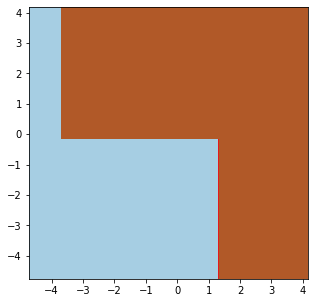

In [5]:
bdt = AdaBoostClassifier(n_estimators = 50, random_state = 0, learning_rate = 1.0)
bdt.fit(X, y)


plot_step = 0.02
class_names = ['Positive', 'Negative']
plt.figure(figsize=(5, 5))
x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, plot_step),
np.arange(x2_min, x2_max, plot_step))
Z = bdt.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)
cs = plt.contourf(xx1, xx2, Z, cmap=plt.cm.Paired)
plt.axis("tight")

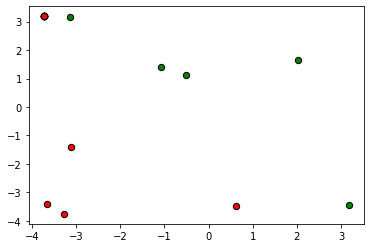

In [6]:
for i, n in zip(range(1), class_names):
    idx = np.where(y == 1)
    plt.scatter(X[idx, 0], X[idx, 1], c = 'g', cmap=plt.cm.Paired, s = 40, edgecolor='k', label="Class %s" % class_names[i]) 
    i = i+1
    idx = np.where(y == -1)
    plt.scatter(X[idx, 0], X[idx, 1], c = 'r', cmap=plt.cm.Paired, s = 40, edgecolor='k', label="Class %s" % class_names[i]) 

In [9]:
from sklearn.datasets import make_blobs

X_test, y_test = make_blobs(n_samples=50, centers=2, random_state=7, cluster_std=1.5)
y_test[y_test == 0] = -1

from sklearn.metrics import confusion_matrix
y_pred = bdt.predict(X_test) 
confusion = confusion_matrix(y_test,y_pred)
print('Confusion Matrix : \n', confusion)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=class_names))


Confusion Matrix : 
 [[25  0]
 [ 0 25]]
              precision    recall  f1-score   support

    Positive       1.00      1.00      1.00        25
    Negative       1.00      1.00      1.00        25

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

